In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/csv/title_genres_v2.csv", delimiter=",")

In [91]:
df.shape

(30586, 55)

In [3]:
df.columns

Index(['title', 'action', 'drama', 'fantasy', 'mystery', 'adventure',
       'excessive violence', 'horror', 'psychological drama',
       'supernatural drama', 'military', 'shounen', 'super power',
       'psychological', 'supernatural', 'thriller', 'crime fiction', 'police',
       'suspense', 'comedy', 'fighting-shounen', 'ganbatte', 'school',
       'demons', 'historical', 'parody', 'romance', 'game', 'seinen',
       'ghost stories', 'martial arts', 'slice of life', 'sentimental drama',
       'music', 'sports', 'ecchi', 'harem', 'mecha', 'vampire', 'gourmet',
       'avant garde', 'samurai', 'shoujo', 'nonsense-comedy', 'boys love',
       'girls love', 'kids', 'indefinite', 'josei', 'space', 'cars', 'hentai',
       'magical_girl', 'science fiction', 'erotic'],
      dtype='object')

In [4]:
genres = df.columns[1:]
genres

Index(['action', 'drama', 'fantasy', 'mystery', 'adventure',
       'excessive violence', 'horror', 'psychological drama',
       'supernatural drama', 'military', 'shounen', 'super power',
       'psychological', 'supernatural', 'thriller', 'crime fiction', 'police',
       'suspense', 'comedy', 'fighting-shounen', 'ganbatte', 'school',
       'demons', 'historical', 'parody', 'romance', 'game', 'seinen',
       'ghost stories', 'martial arts', 'slice of life', 'sentimental drama',
       'music', 'sports', 'ecchi', 'harem', 'mecha', 'vampire', 'gourmet',
       'avant garde', 'samurai', 'shoujo', 'nonsense-comedy', 'boys love',
       'girls love', 'kids', 'indefinite', 'josei', 'space', 'cars', 'hentai',
       'magical_girl', 'science fiction', 'erotic'],
      dtype='object')

In [5]:
df2 = pd.read_csv("data/csv/title_single_valued_attrs.csv", delimiter=',')

d:\ComputerScience\BachKhoa\IntroDataScience\Anime-Analysis\venv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df2.columns

Index(['title', 'romaji_title', 'english_title', 'mean_score_anilist',
       'weighted_score_anilist', 'popularity_anilist', 'favorites_anilist',
       'duration', 'status', 'episodes', 'source', 'season_season',
       'season_year', 'media_type', 'anilist_url', 'creator', 'prequel',
       'sequel', 'directors', 'status_completed_anilist',
       'status_planning_anilist', 'status_current_anilist',
       'status_paused_anilist', 'status_dropped_anilist', 'start_date',
       'end_date', 'mean_score_anisearch', 'popularity_anisearch',
       'favorites_anisearch', 'status_completed_anisearch',
       'status_planning_anisearch', 'status_current_anisearch',
       'status_paused_anisearch', 'status_dropped_anisearch',
       'number_scorer_anisearch', 'url', 'age', 'mean_score_kitsu',
       'favorite_count_kitsu', 'rating_rank_kitsu', 'user_count_kitsu',
       'mean_score_mal', 'popularity_mal', 'number_scorer_mal',
       'favorites_mal'],
      dtype='object')

In [7]:
len(df2.columns)

45

In [8]:
result = pd.concat([df, df2], axis=1)

In [9]:
result = result.loc[:,~result.columns.duplicated()]

In [10]:
result.head(5)

,title,action,drama,fantasy,mystery,adventure,excessive violence,horror,psychological drama,supernatural drama,...,url,age,mean_score_kitsu,favorite_count_kitsu,rating_rank_kitsu,user_count_kitsu,mean_score_mal,popularity_mal,number_scorer_mal,favorites_mal
0,attack on titan,1,1,1,1,1,1,1,1,1,...,"https://www.anisearch.com/anime/8219,attack-on...",r,8.49,6835.0,11.0,350376.0,8.51,3104669.0,2168959.0,137690.0
1,death note,0,1,1,1,0,0,1,1,1,...,"https://www.anisearch.com/anime/3633,death-note",r,8.36,5750.0,25.0,303639.0,8.63,3130472.0,2159771.0,142925.0
2,my hero academia,1,1,1,0,1,0,0,0,0,...,"https://www.anisearch.com/anime/10978,my-hero-...",pg,8.45,4349.0,15.0,325631.0,7.99,2396529.0,1624157.0,50118.0
3,demon slayer kimetsu no yaiba,1,1,1,0,1,1,1,0,0,...,"https://www.anisearch.com/anime/13658,demon-sl...",r,NaN,NaN,NaN,NaN,8.57,2069110.0,1380152.0,67452.0
4,hunter x hunter 2011,1,0,1,0,1,0,0,0,0,...,NaN,pg,8.43,6271.0,18.0,243790.0,9.06,2123271.0,1245840.0,164535.0


In [11]:
len(result)

30586

In [12]:
result.loc[:, "mean_score_anilist"] = result["mean_score_anilist"].apply(lambda x: x*10)

In [13]:
result["mean_score_anilist"]

0        8.5
1        8.4
2        7.9
3        8.5
4        9.0
        ... 
30581    NaN
30582    NaN
30583    NaN
30584    NaN
30585    NaN
Name: mean_score_anilist, Length: 30586, dtype: float64

## Box plot & Violin plot

### All genres

In [14]:
len(genres)

54

In [15]:
def median_score_by_genre_mal(genre):
    return result[result[genre] == 1]["mean_score_mal"].dropna().median()

In [16]:
median_score_by_genre_mal("action")

6.73

In [17]:
genres = list(genres)

In [18]:
mal_genres = sorted(genres, key=median_score_by_genre_mal)

In [54]:
def box_plot_genres_score(website, genres, color):
    sns.set_theme()
    sns.set_style("darkgrid")
    score = "mean_score_" + website
    NUM_ROWS = 3
    NUM_COLS = 18
    fig, axs = plt.subplots(nrows=NUM_ROWS, figsize=(35, 50))
    anime_batch = []
    genres_batch = []
    for idx, genre in enumerate(genres):
        anime = result[result[genre] == 1]
        anime_batch.append(anime[score].dropna())
        genres_batch.append(genre)
        row = idx // NUM_COLS
        if len(genres_batch) == NUM_COLS:
            ax = sns.boxplot(data=anime_batch, ax=axs[row], color=color)
            ax.set(ylim=(1, 10))
            ax.set_xticklabels(genres_batch)
            ax.set_xlabel("Genres")
            ax.set_ylabel("Mean Score " + website.capitalize())
            genres_batch = []
            anime_batch = []

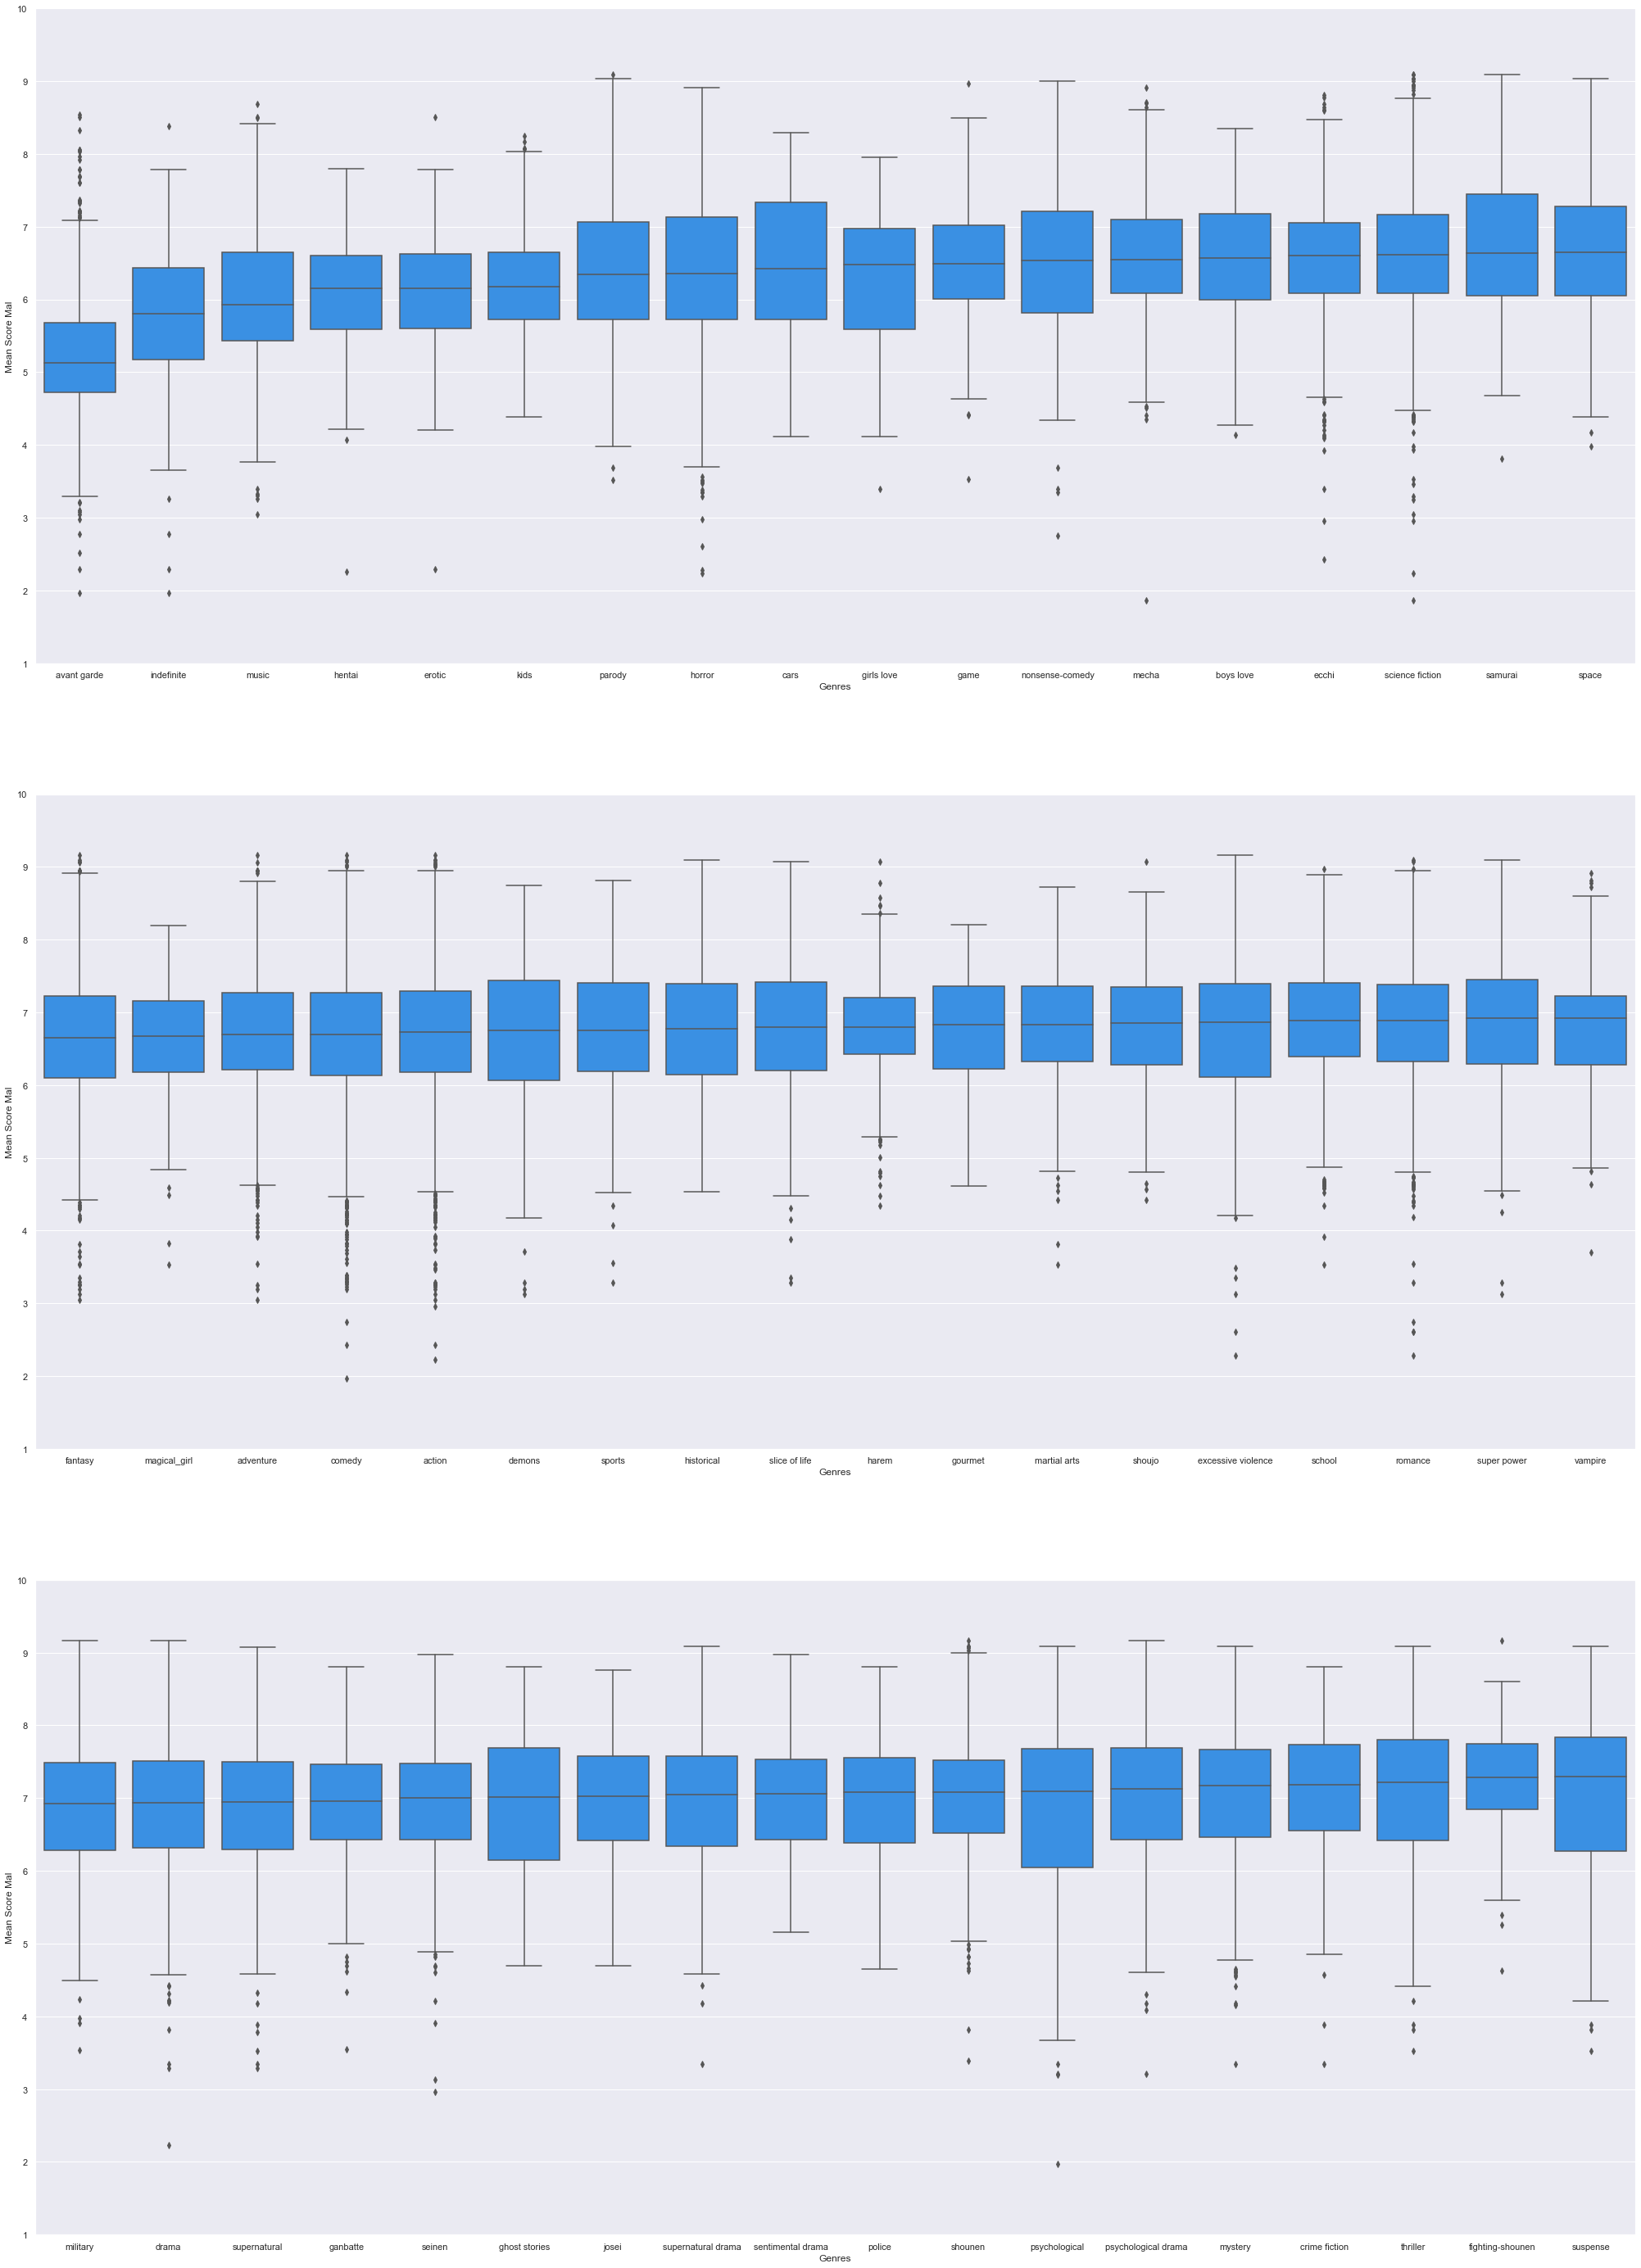

In [55]:
box_plot_genres_score("mal", mal_genres, color="dodgerblue")

In [31]:
def median_score_by_genre_anilist(genre):
    return result[result[genre] == 1]["mean_score_anilist"].median()

In [38]:
genres_anilist = sorted(genres, key=median_score_by_genre_anilist)

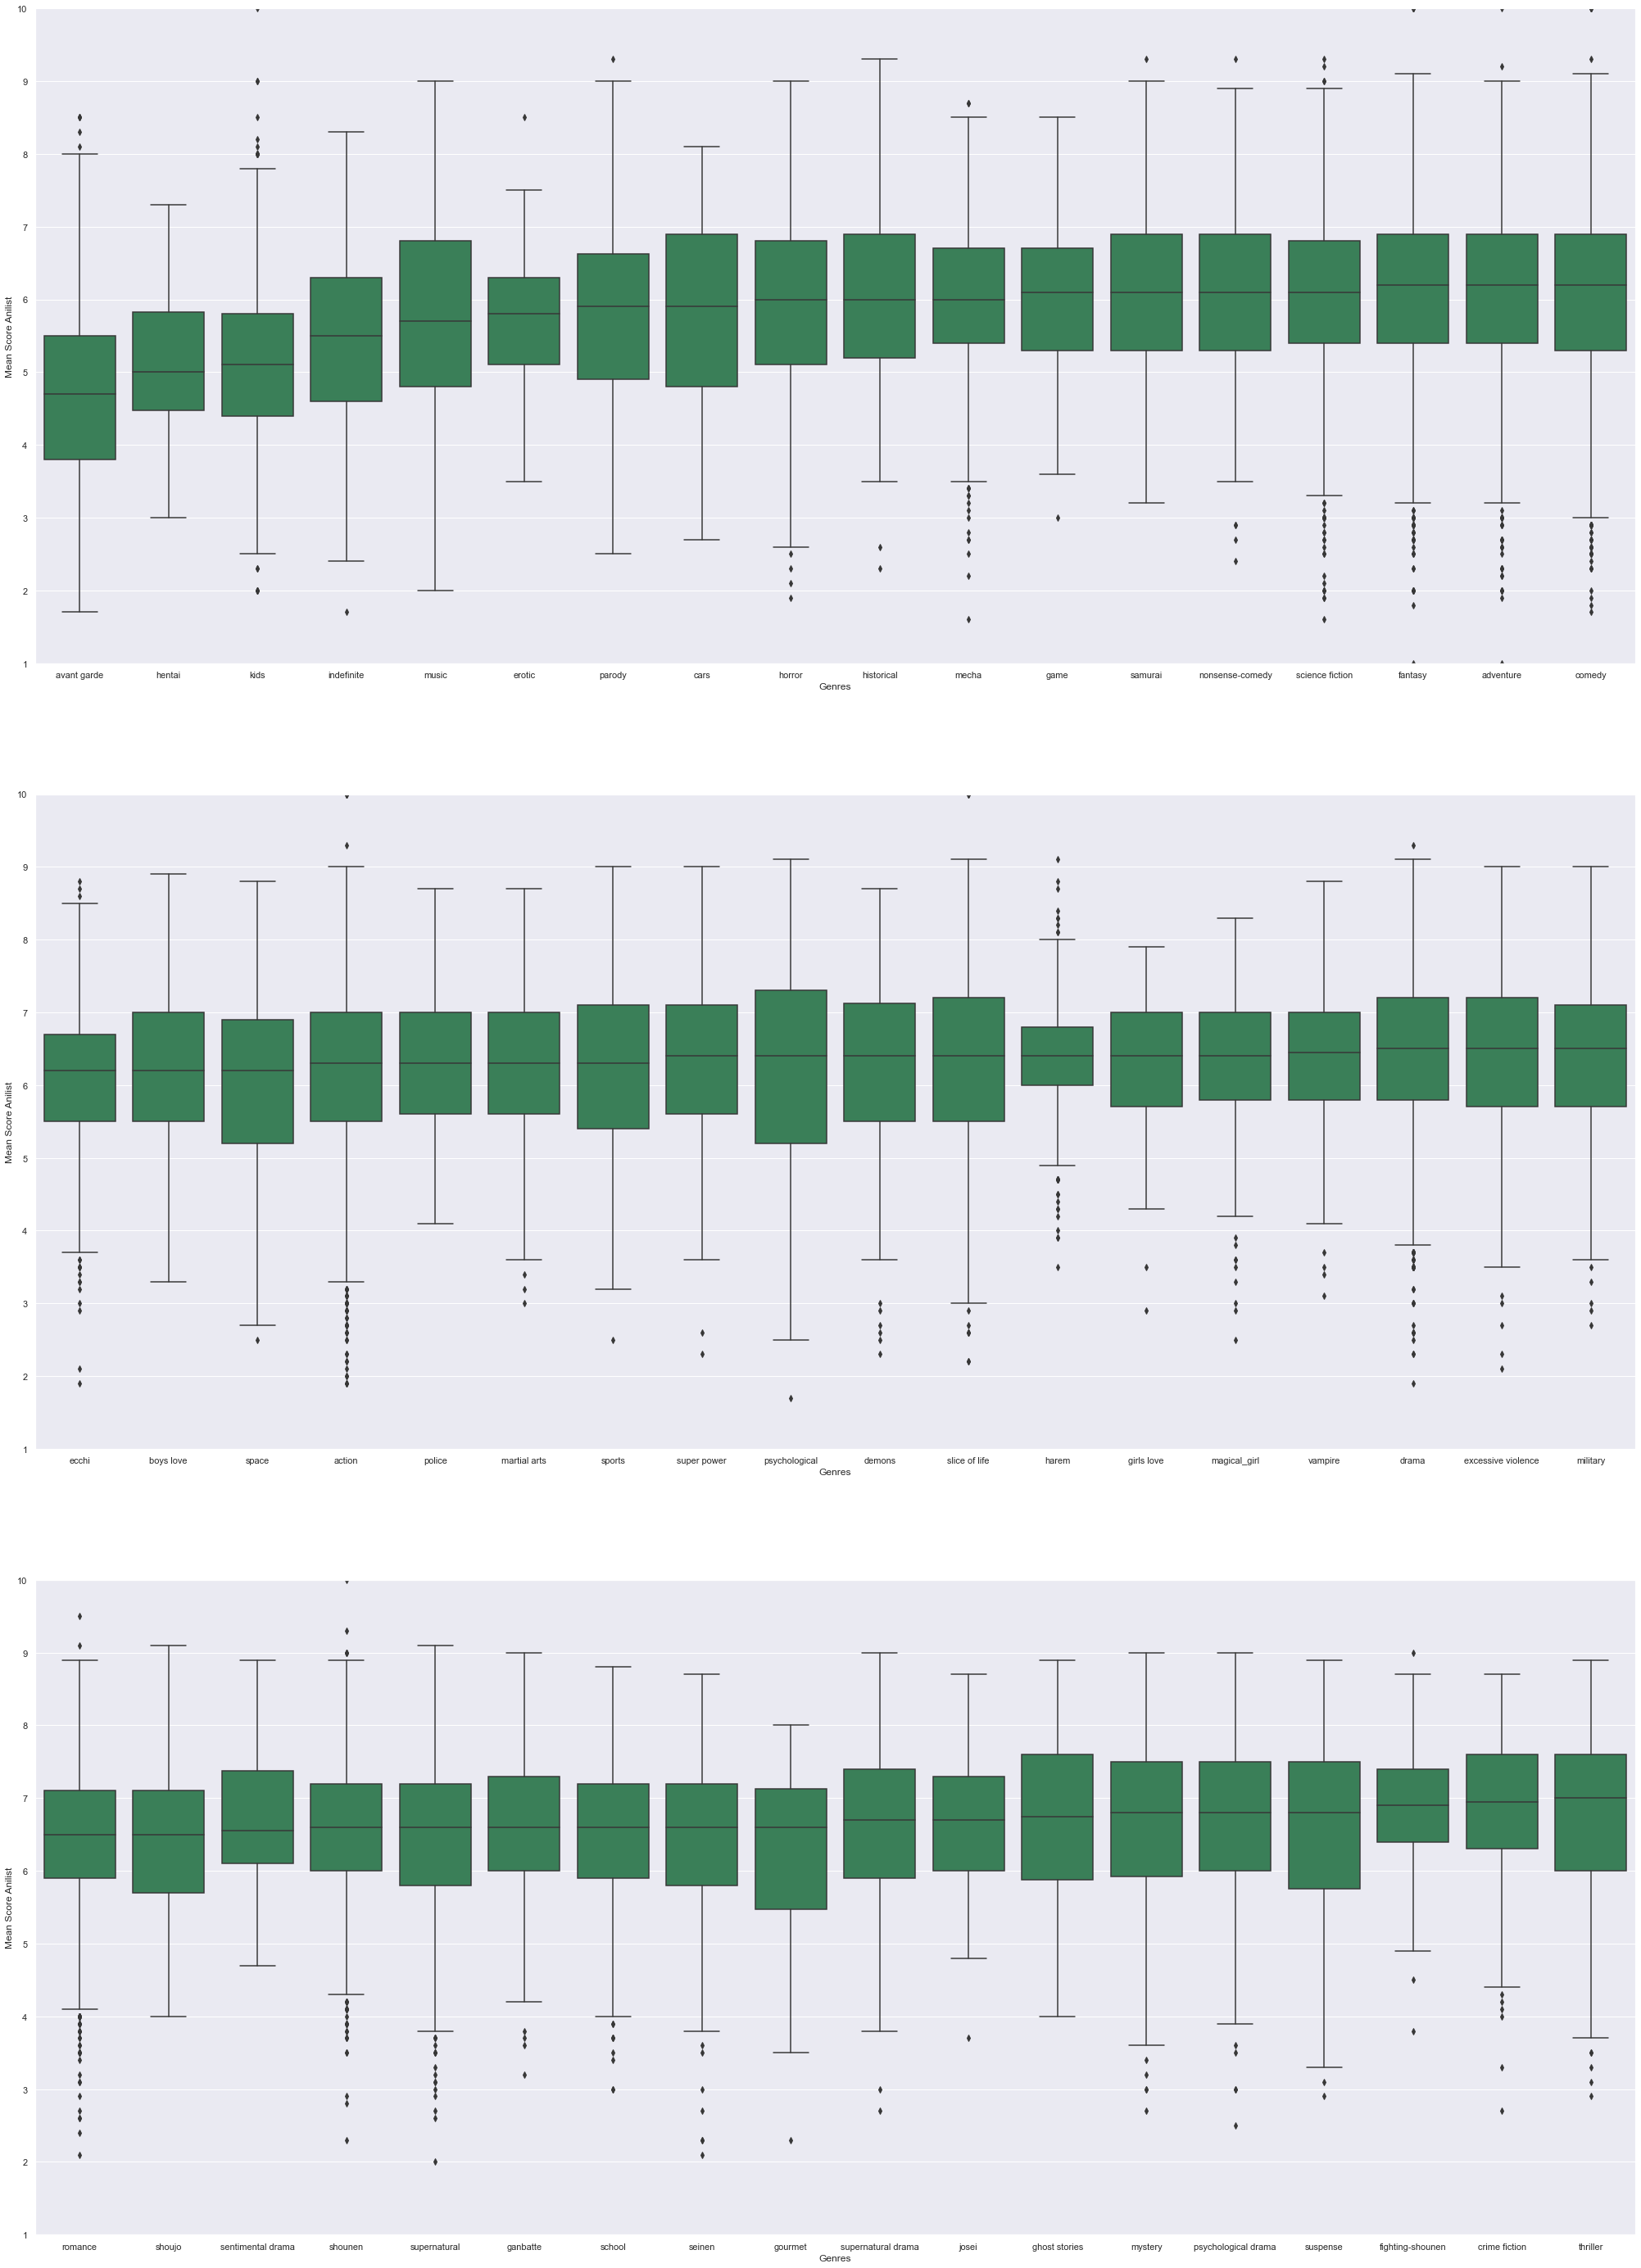

In [56]:
box_plot_genres_score("anilist", genres_anilist, color="seagreen")

In [43]:
def median_score_by_genre_kitsu(genre):
    return result[result[genre] == 1]["mean_score_kitsu"].median()

In [58]:
genres_kitsu = sorted(genres, key=median_score_by_genre_kitsu)

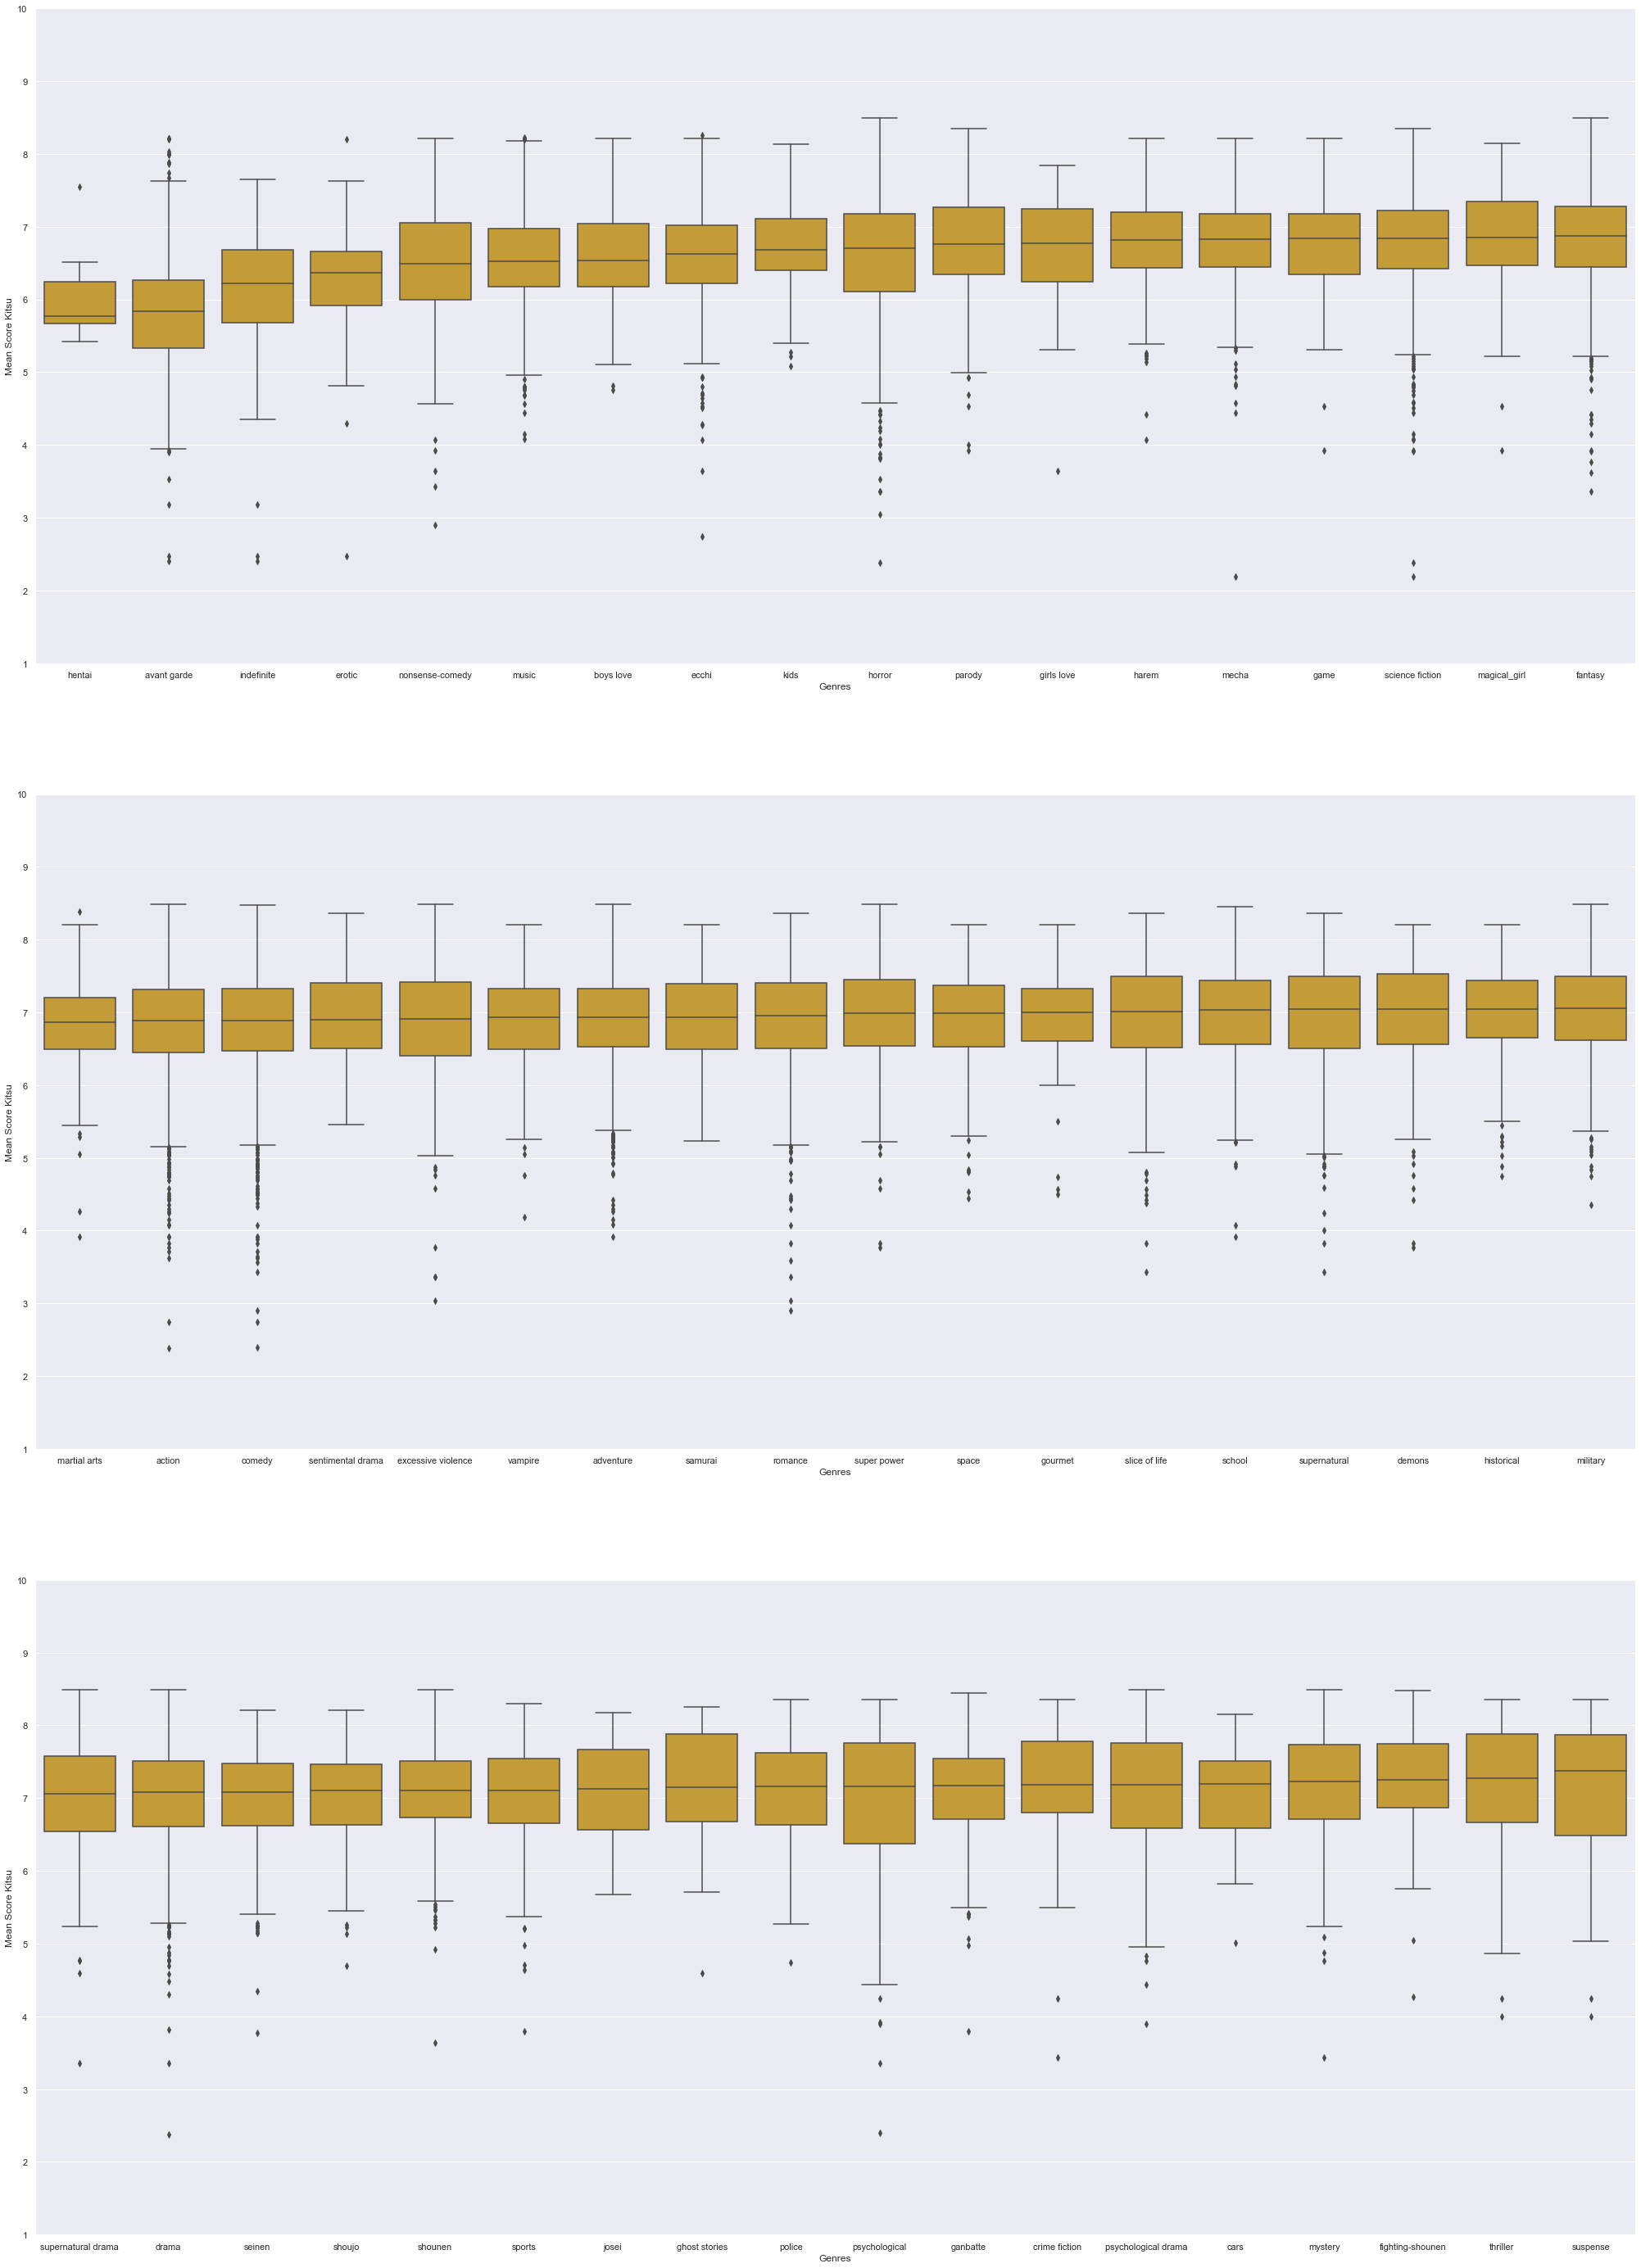

In [59]:
box_plot_genres_score("kitsu", genres_kitsu, color="goldenrod")

In [46]:
def median_score_by_genre_anisearch(genre):
    return result[result[genre] == 1]["mean_score_anisearch"].median()

In [47]:
genres_anisearch = sorted(genres, key=median_score_by_genre_anisearch)

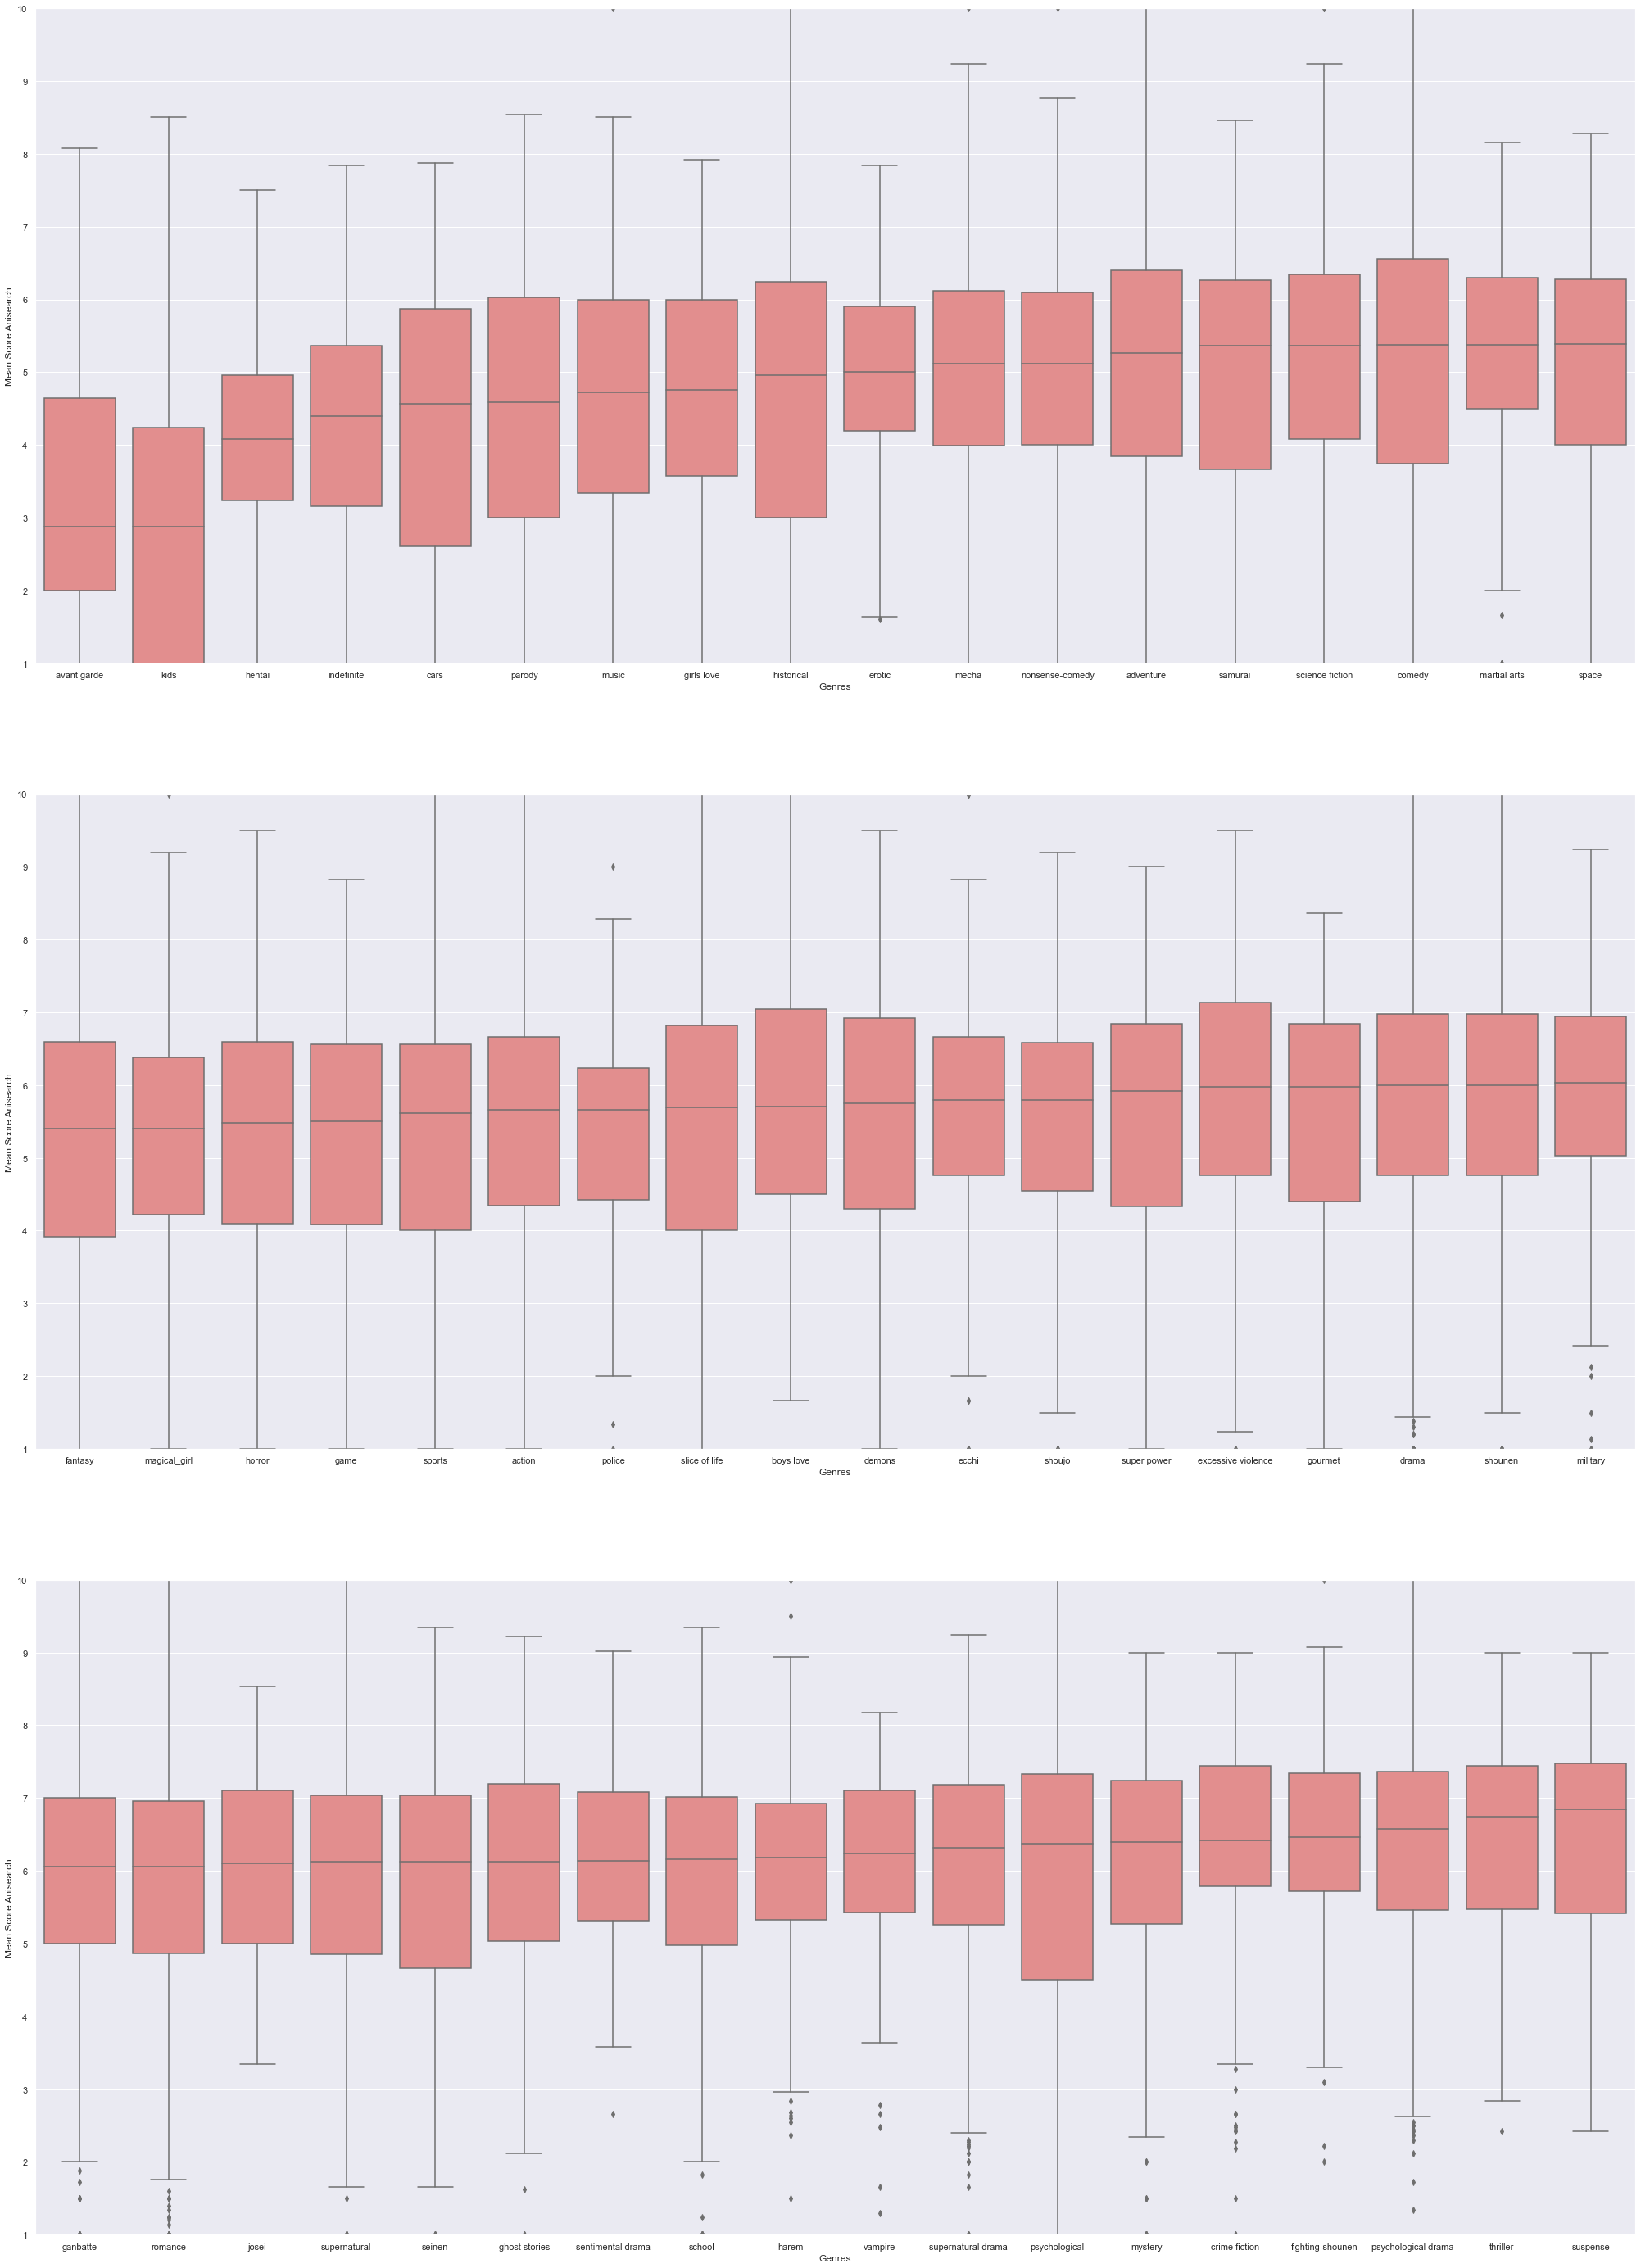

In [61]:
box_plot_genres_score("anisearch", genres_anisearch, color="lightcoral")

### Studios

In [113]:
df3 = pd.read_csv("data/csv/title_studios_preprocessed.csv", delimiter=",")

In [114]:
df3.head()

,title,wit studio,madhouse,bones,ufotable,a-1 pictures,studio pierrot,mappa,cloverworks,comix wave,...,wan wei mao donghua,alpha animation,tecarat,shenying animation,saigo no shudan,usagi ou,pops inc.,creatures inc.,triopen studio,few_production_studio
0,attack on titan,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,death note,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,my hero academia,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,demon slayer kimetsu no yaiba,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,hunter x hunter 2011,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
df3.columns

Index(['title', 'wit studio', 'madhouse', 'bones', 'ufotable', 'a-1 pictures',
       'studio pierrot', 'mappa', 'cloverworks', 'comix wave',
       ...
       'wan wei mao donghua', 'alpha animation', 'tecarat',
       'shenying animation', 'saigo no shudan', 'usagi ou', 'pops inc.',
       'creatures inc.', 'triopen studio', 'few_production_studio'],
      dtype='object', length=610)

In [116]:
studios = df3.columns[1:]

In [117]:
def num_anime_by_studio(studio):
    return len(df3[df3[studio] == 1])

In [118]:
studios = list(studios)

In [119]:
studios.sort(key=num_anime_by_studio, reverse=True)

In [120]:
to_be_dropped = studios[50:]

In [121]:
df3.drop(to_be_dropped, axis=1, inplace=True)

In [122]:
df3.columns

Index(['title', 'wit studio', 'madhouse', 'bones', 'ufotable', 'a-1 pictures',
       'studio pierrot', 'mappa', 'cloverworks', 'kyoto animation', 'lerche',
       'production i.g', 'white fox', 'toei animation', 'tms entertainment',
       'studio deen', 'sunrise', 'gainax', 'tatsunoko production', 'satelight',
       'brain's base', 'shaft', 'lidenfilms', 'bandai namco pictures', 'feel.',
       'tezuka productions', 'doga kobo', 'silver link.', 'diomedéa',
       'shin-ei animation', 'zexcs', 'olm', 'xebec', 'gonzo',
       'nippon animation', 'seven', 'aic', 'studio gallop', 'studio 4°c',
       'dle', 'group tac', 'magic bus', 'shanghai animation film studio',
       'commonsense inc.', 'j.c.staff', 'anime international co., inc.',
       't-rex', 'studio 9 maiami', 'production i.g., inc.', 'y.o.u.c',
       'few_production_studio'],
      dtype='object')

In [123]:
df3.shape

(16070, 51)

In [124]:
df2.shape

(30586, 45)

In [125]:
studios = df3.columns[1:]

In [126]:
anime_studios = pd.concat([df3, df2], axis=1)

In [127]:
anime_studios = anime_studios.loc[:,~anime_studios.columns.duplicated()]

In [128]:
anime_studios.shape

(30586, 95)

In [129]:
anime_studios.head()

,title,wit studio,madhouse,bones,ufotable,a-1 pictures,studio pierrot,mappa,cloverworks,kyoto animation,...,url,age,mean_score_kitsu,favorite_count_kitsu,rating_rank_kitsu,user_count_kitsu,mean_score_mal,popularity_mal,number_scorer_mal,favorites_mal
0,attack on titan,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"https://www.anisearch.com/anime/8219,attack-on...",r,8.49,6835.0,11.0,350376.0,8.51,3104669.0,2168959.0,137690.0
1,death note,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"https://www.anisearch.com/anime/3633,death-note",r,8.36,5750.0,25.0,303639.0,8.63,3130472.0,2159771.0,142925.0
2,my hero academia,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"https://www.anisearch.com/anime/10978,my-hero-...",pg,8.45,4349.0,15.0,325631.0,7.99,2396529.0,1624157.0,50118.0
3,demon slayer kimetsu no yaiba,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"https://www.anisearch.com/anime/13658,demon-sl...",r,NaN,NaN,NaN,NaN,8.57,2069110.0,1380152.0,67452.0
4,hunter x hunter 2011,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,pg,8.43,6271.0,18.0,243790.0,9.06,2123271.0,1245840.0,164535.0


In [131]:
studios = list(studios)

In [153]:
def box_plot_studios_score(website, studios, color):
    sns.set_theme()
    sns.set_style("darkgrid")
    score = "mean_score_" + website
    NUM_ROWS = 5
    NUM_COLS = 10
    fig, axs = plt.subplots(nrows=NUM_ROWS, figsize=(30, 40))
    anime_batch = []
    genres_batch = []
    for idx, studio in enumerate(studios):
        anime = anime_studios[anime_studios[studio] == 1]
        anime_batch.append(anime[score].dropna())
        genres_batch.append(studio)
        row = idx // NUM_COLS
        if len(genres_batch) == NUM_COLS:
            ax = sns.boxplot(data=anime_batch, ax=axs[row], color=color)
            ax.set(ylim=(1, 10))
            ax.set_xticklabels(genres_batch)
            ax.set_xlabel("Studios")
            ax.set_ylabel("Mean Score " + website.capitalize())
            genres_batch = []
            anime_batch = []

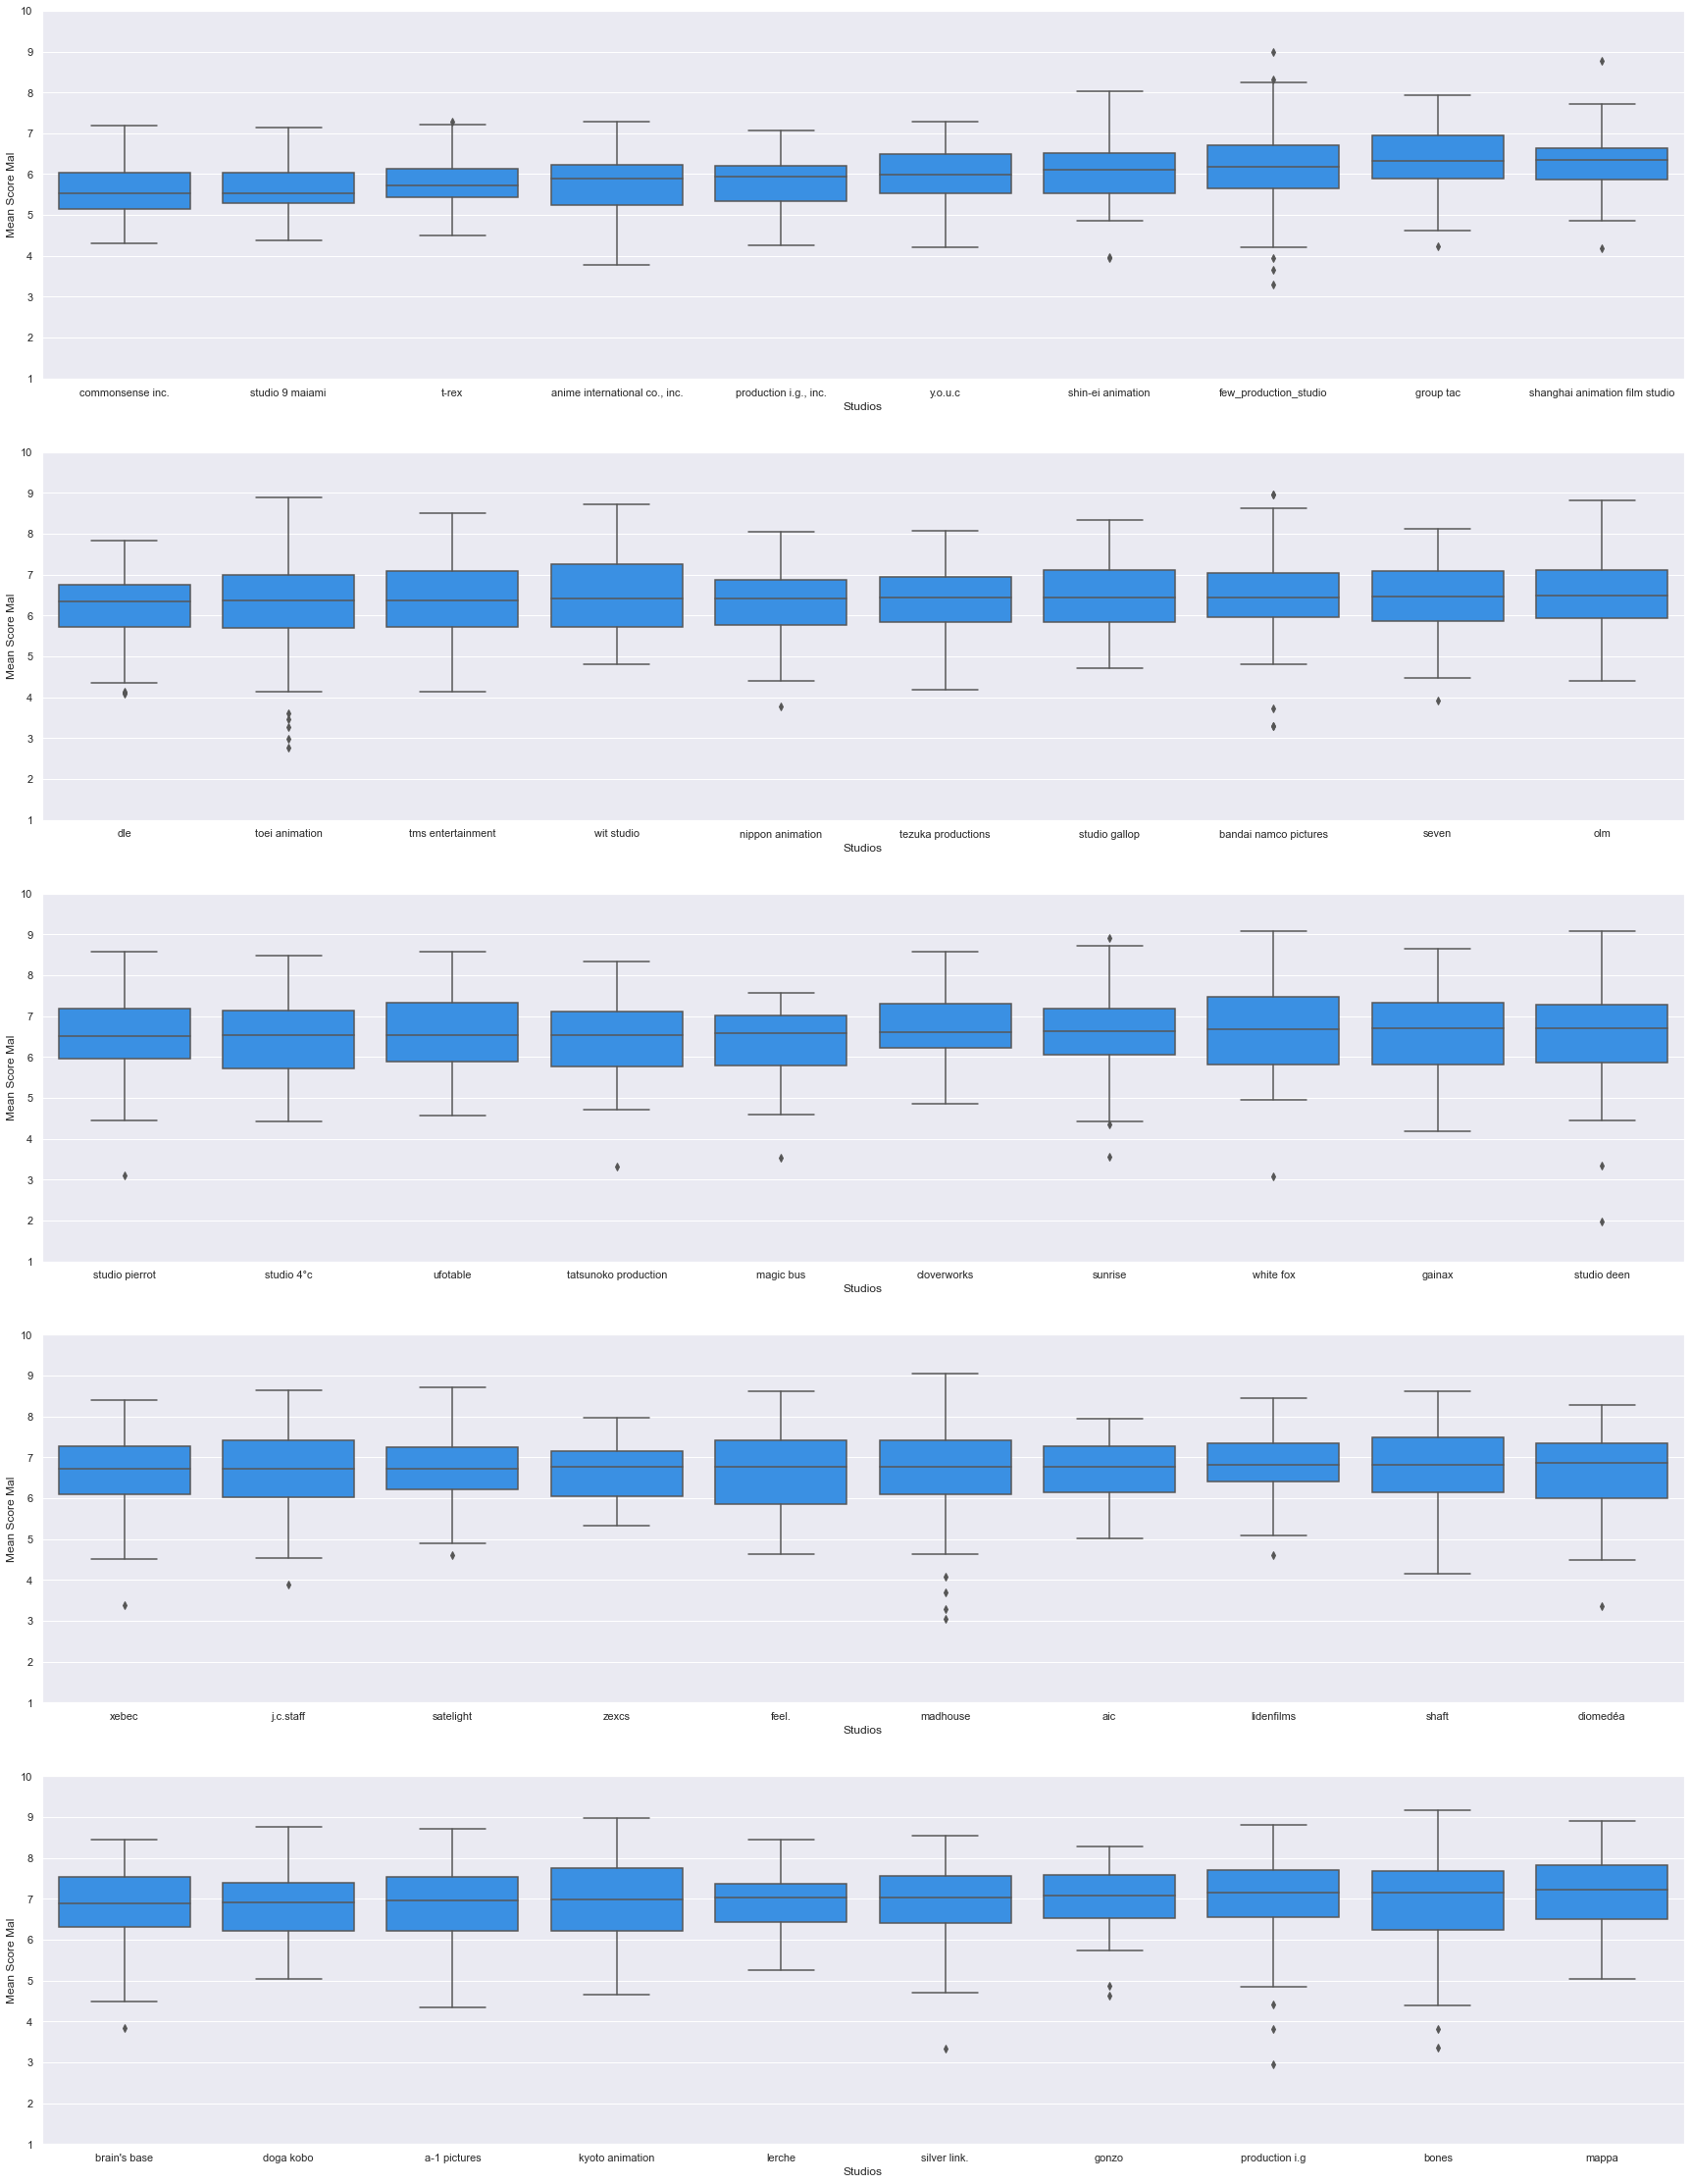

In [154]:
def median_score_mal_by_studio(studio):
    return anime_studios[anime_studios[studio] == 1]["mean_score_mal"].median()
studios.sort(key=median_score_mal_by_studio)
box_plot_studios_score("mal", studios, color="dodgerblue")

In [142]:
anime_studios.loc[:, "mean_score_anilist"] = anime_studios["mean_score_anilist"].apply(lambda x: x*10)

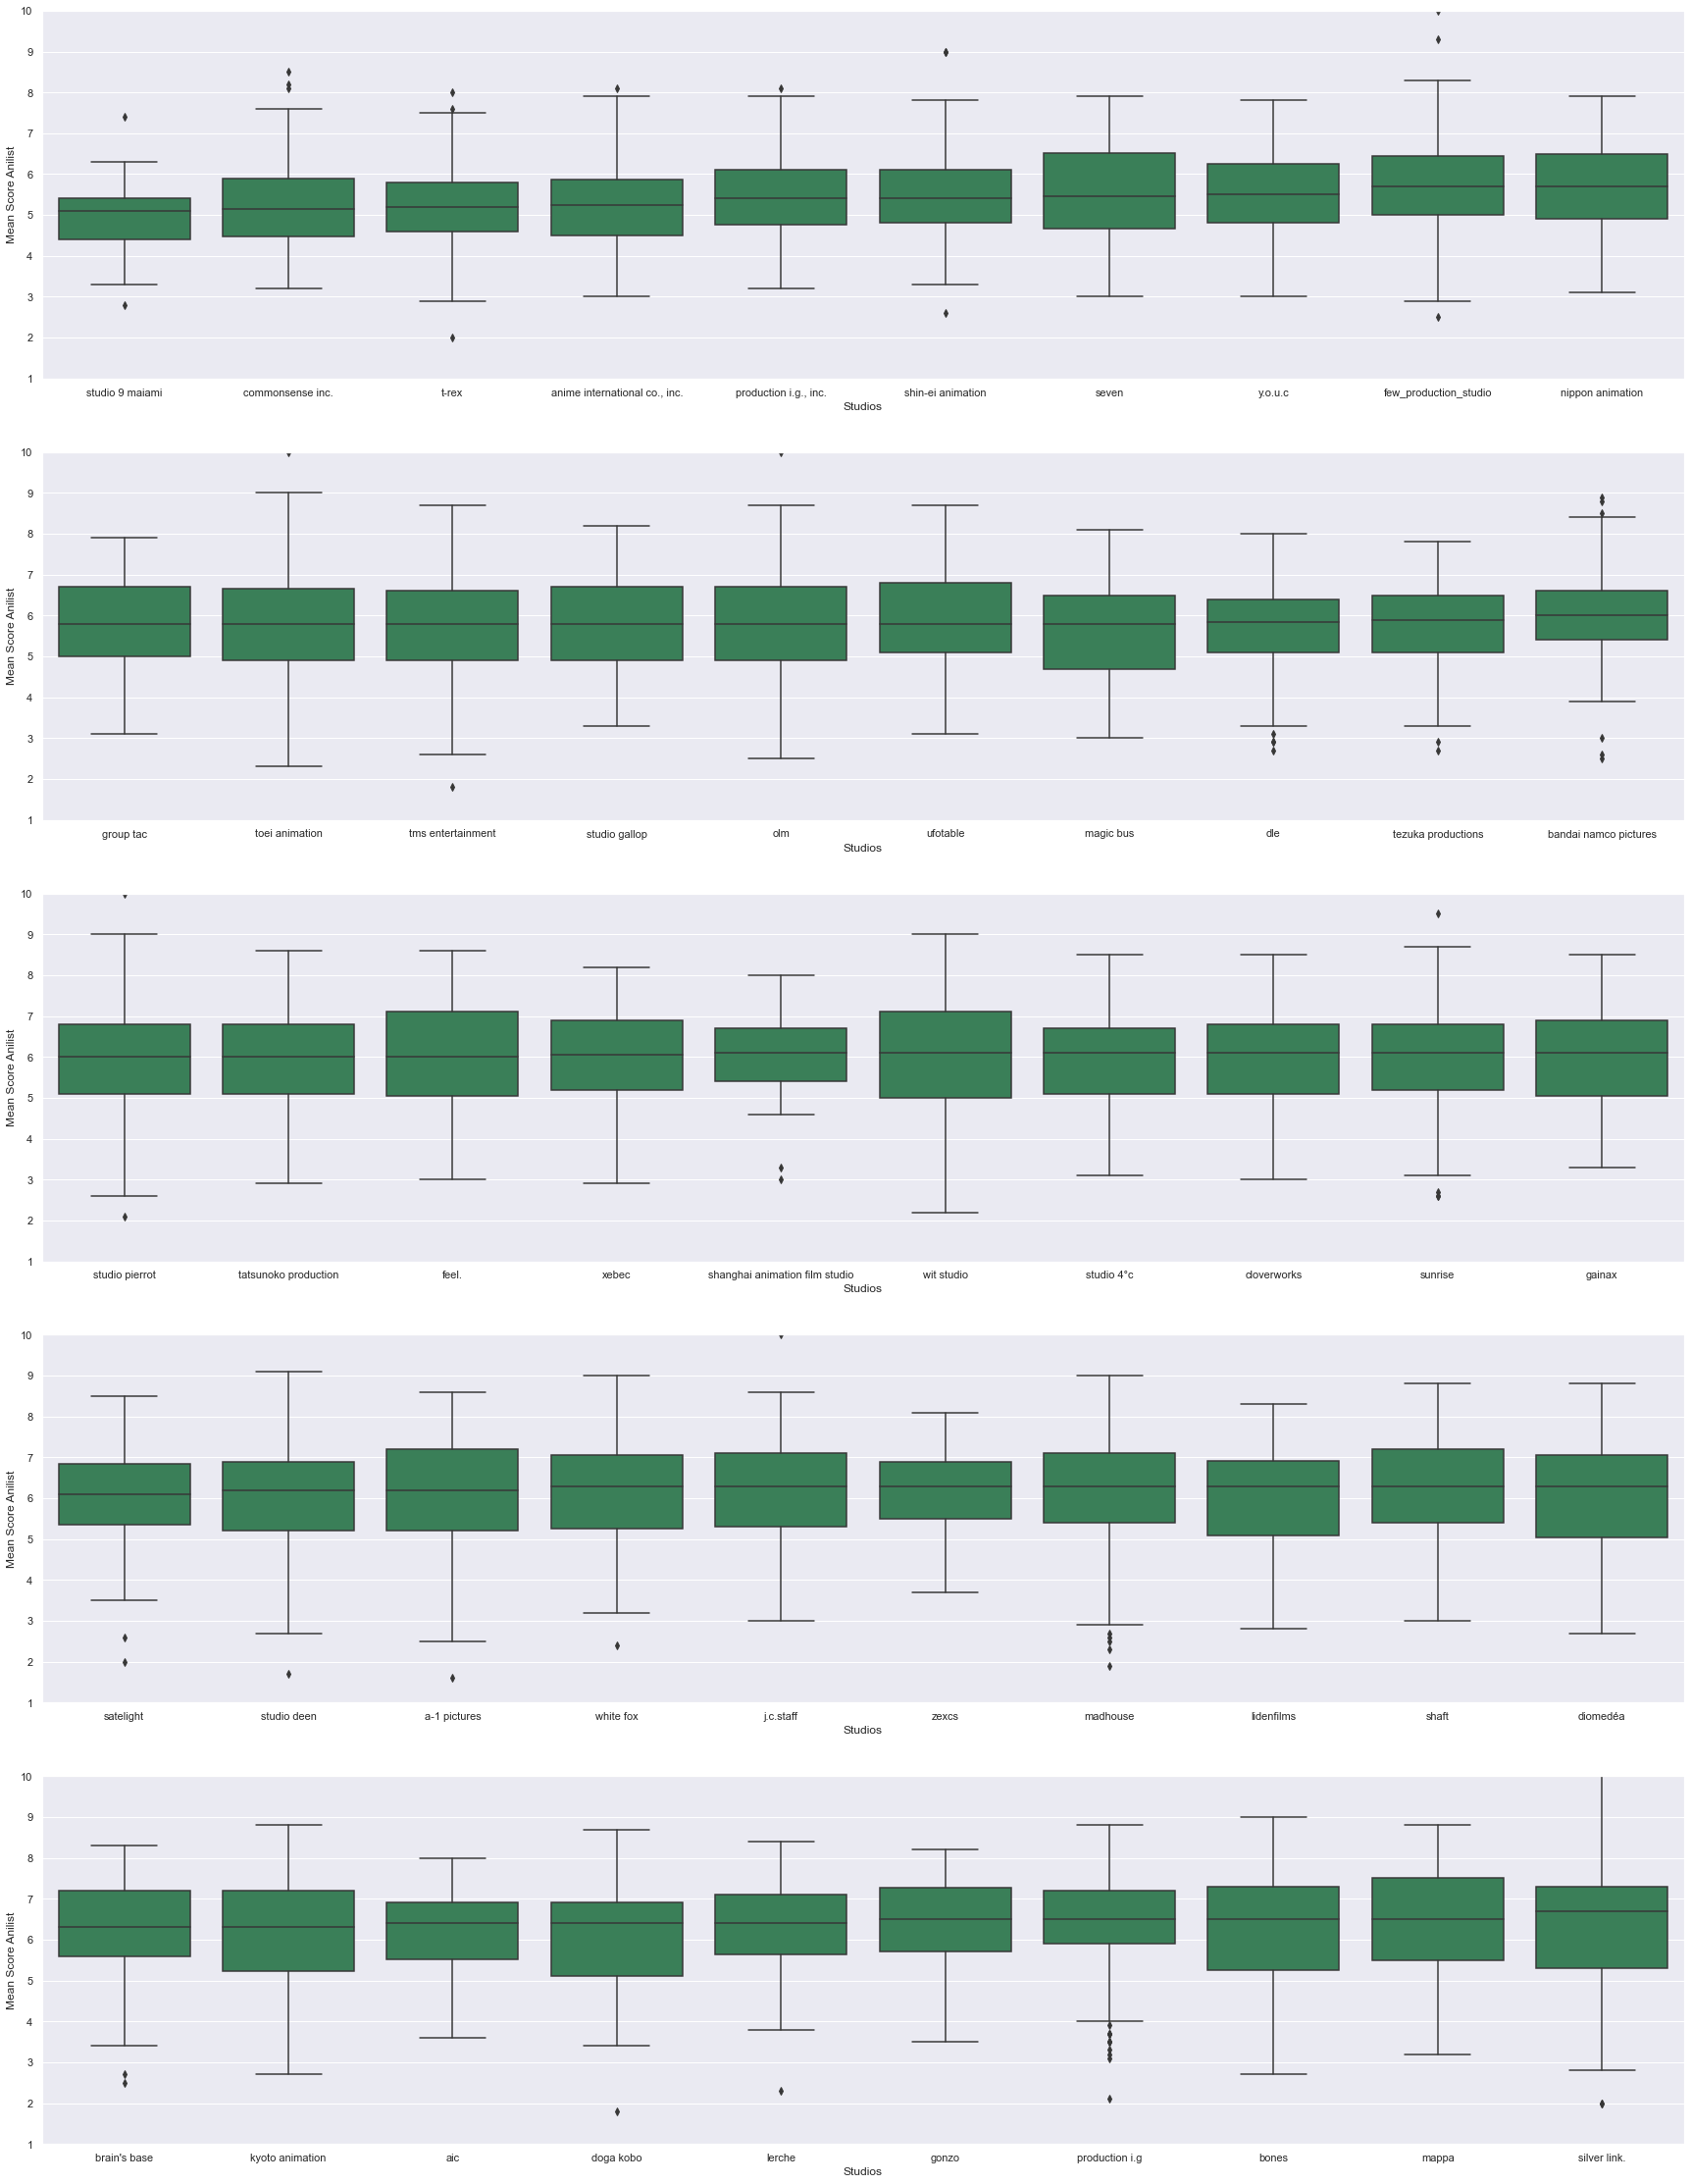

In [155]:
def median_score_anilist_by_studio(studio):
    return anime_studios[anime_studios[studio] == 1]["mean_score_anilist"].median()
studios.sort(key=median_score_anilist_by_studio)
box_plot_studios_score("anilist", studios, color="seagreen")

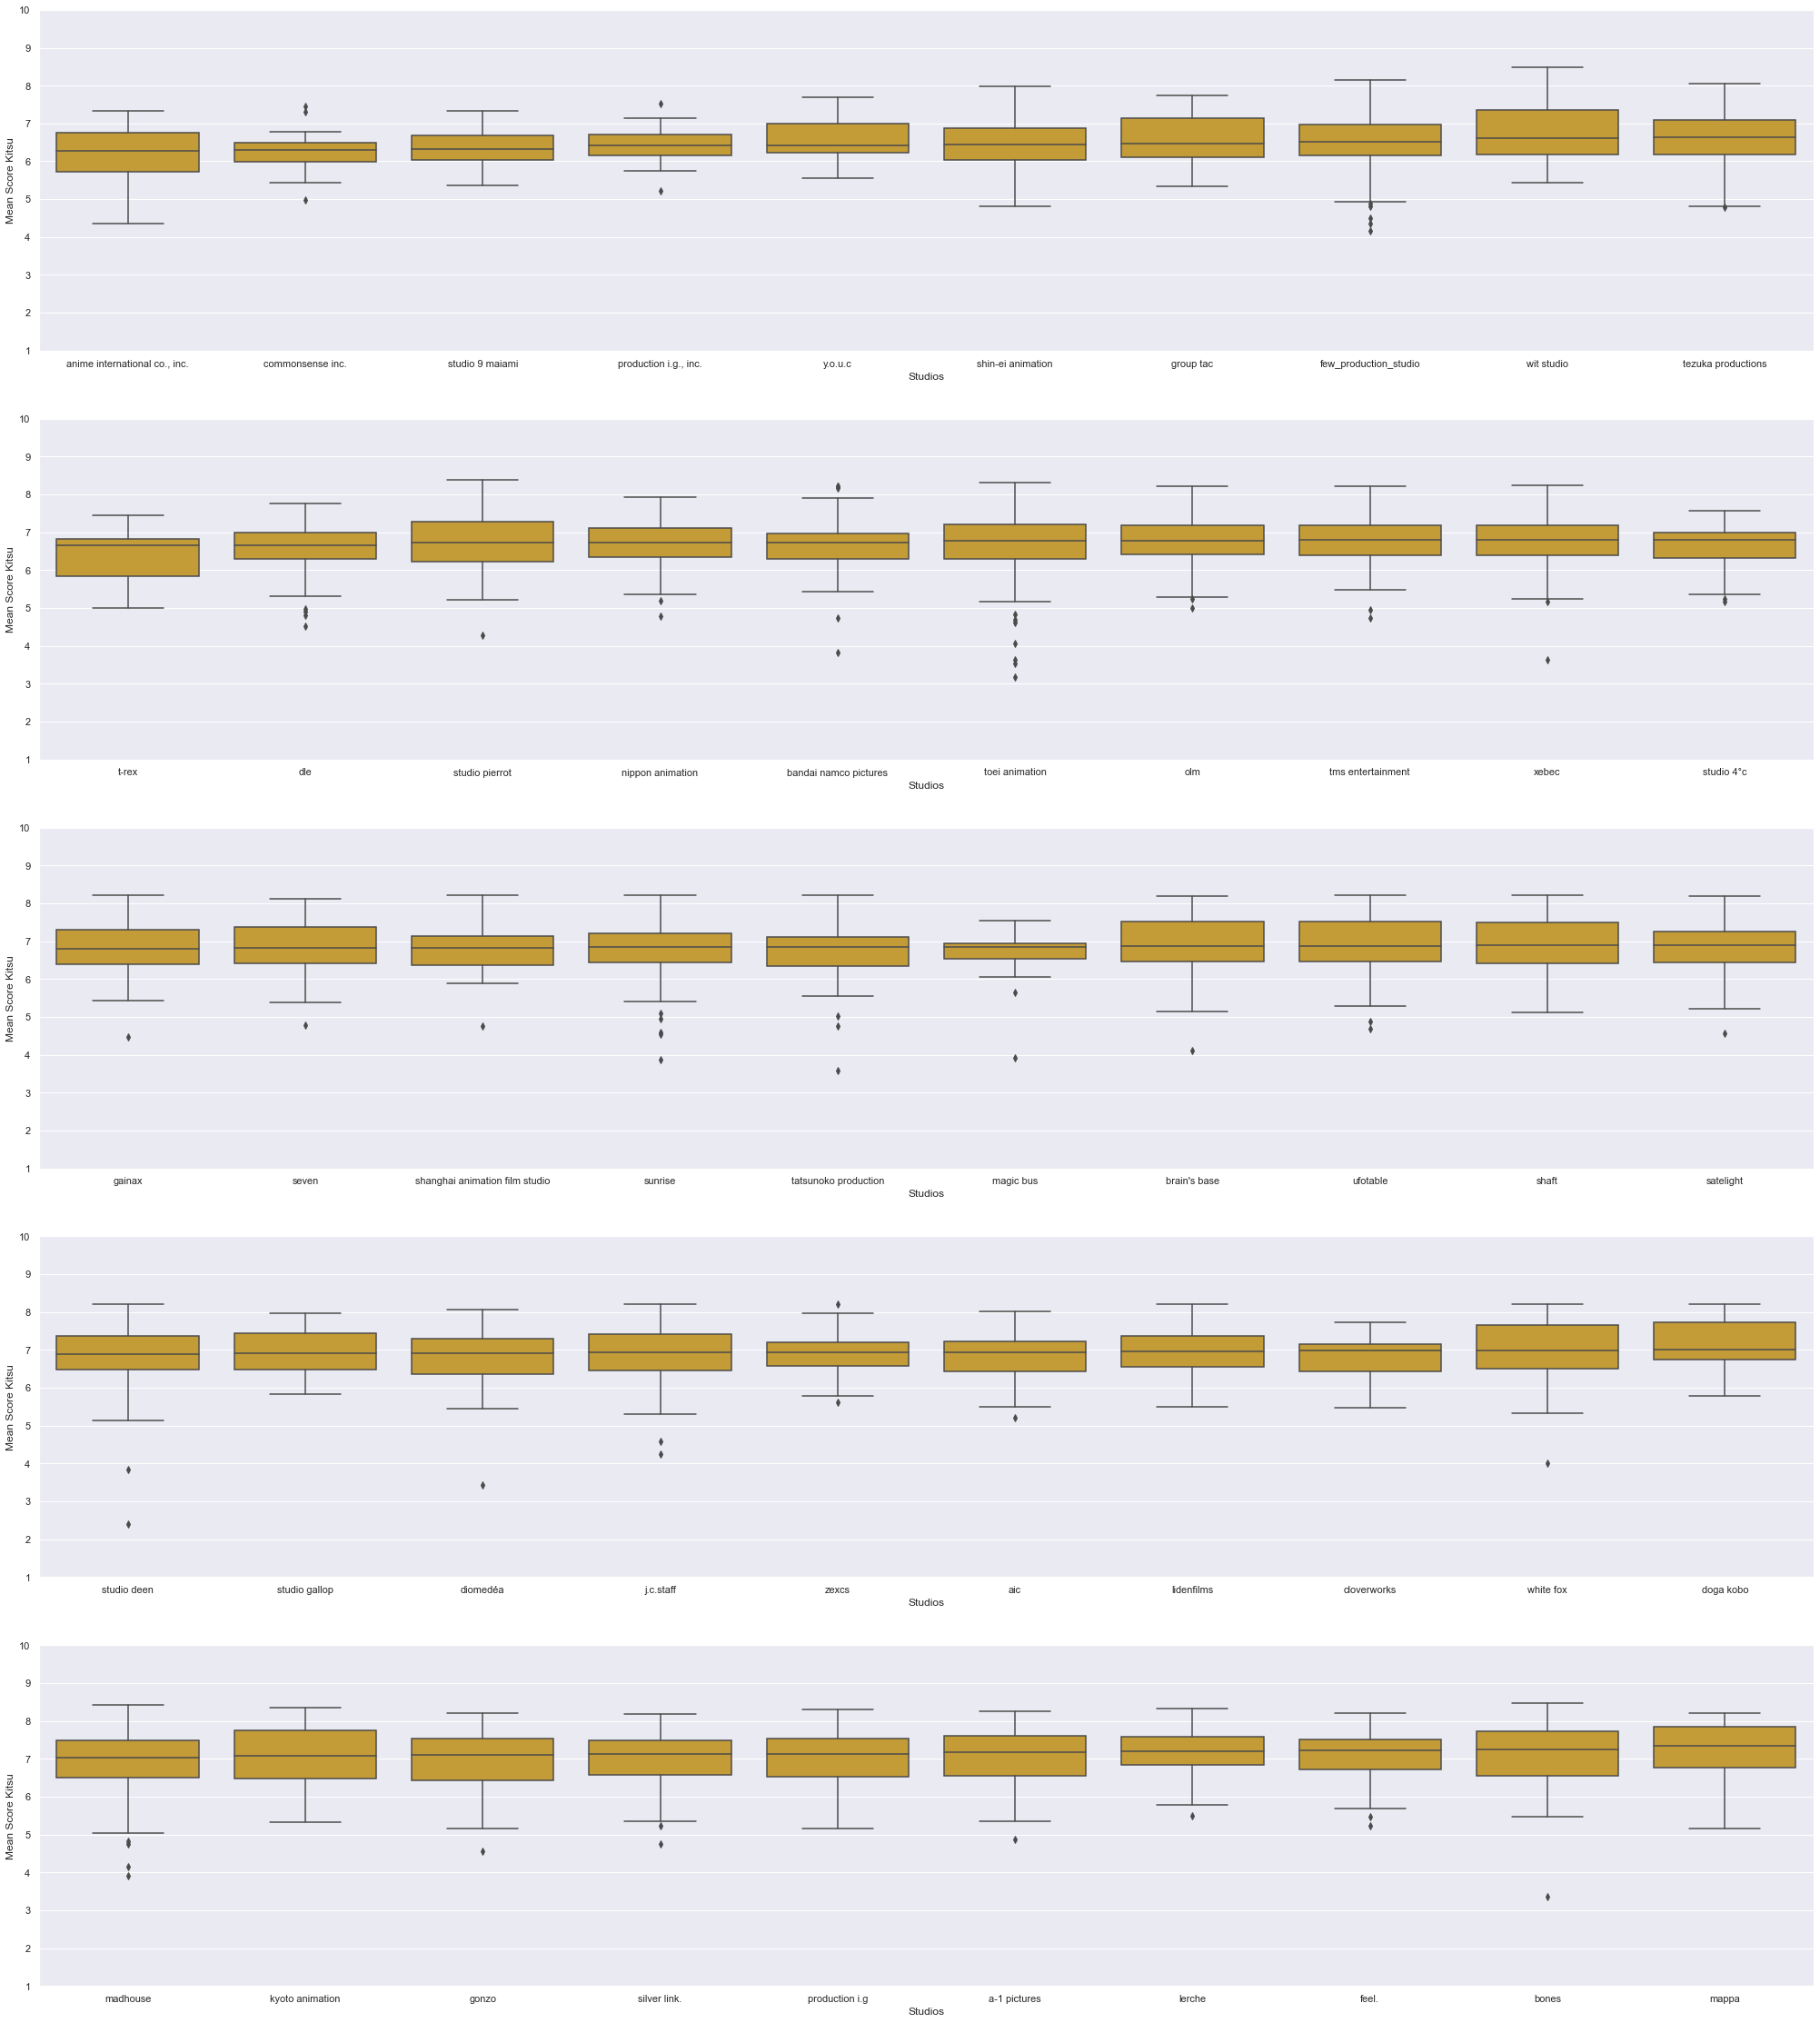

In [147]:
def median_score_kitsu_by_studio(studio):
    return anime_studios[anime_studios[studio] == 1]["mean_score_kitsu"].median()

studios.sort(key=median_score_kitsu_by_studio)
box_plot_studios_score("kitsu", studios, color="goldenrod")

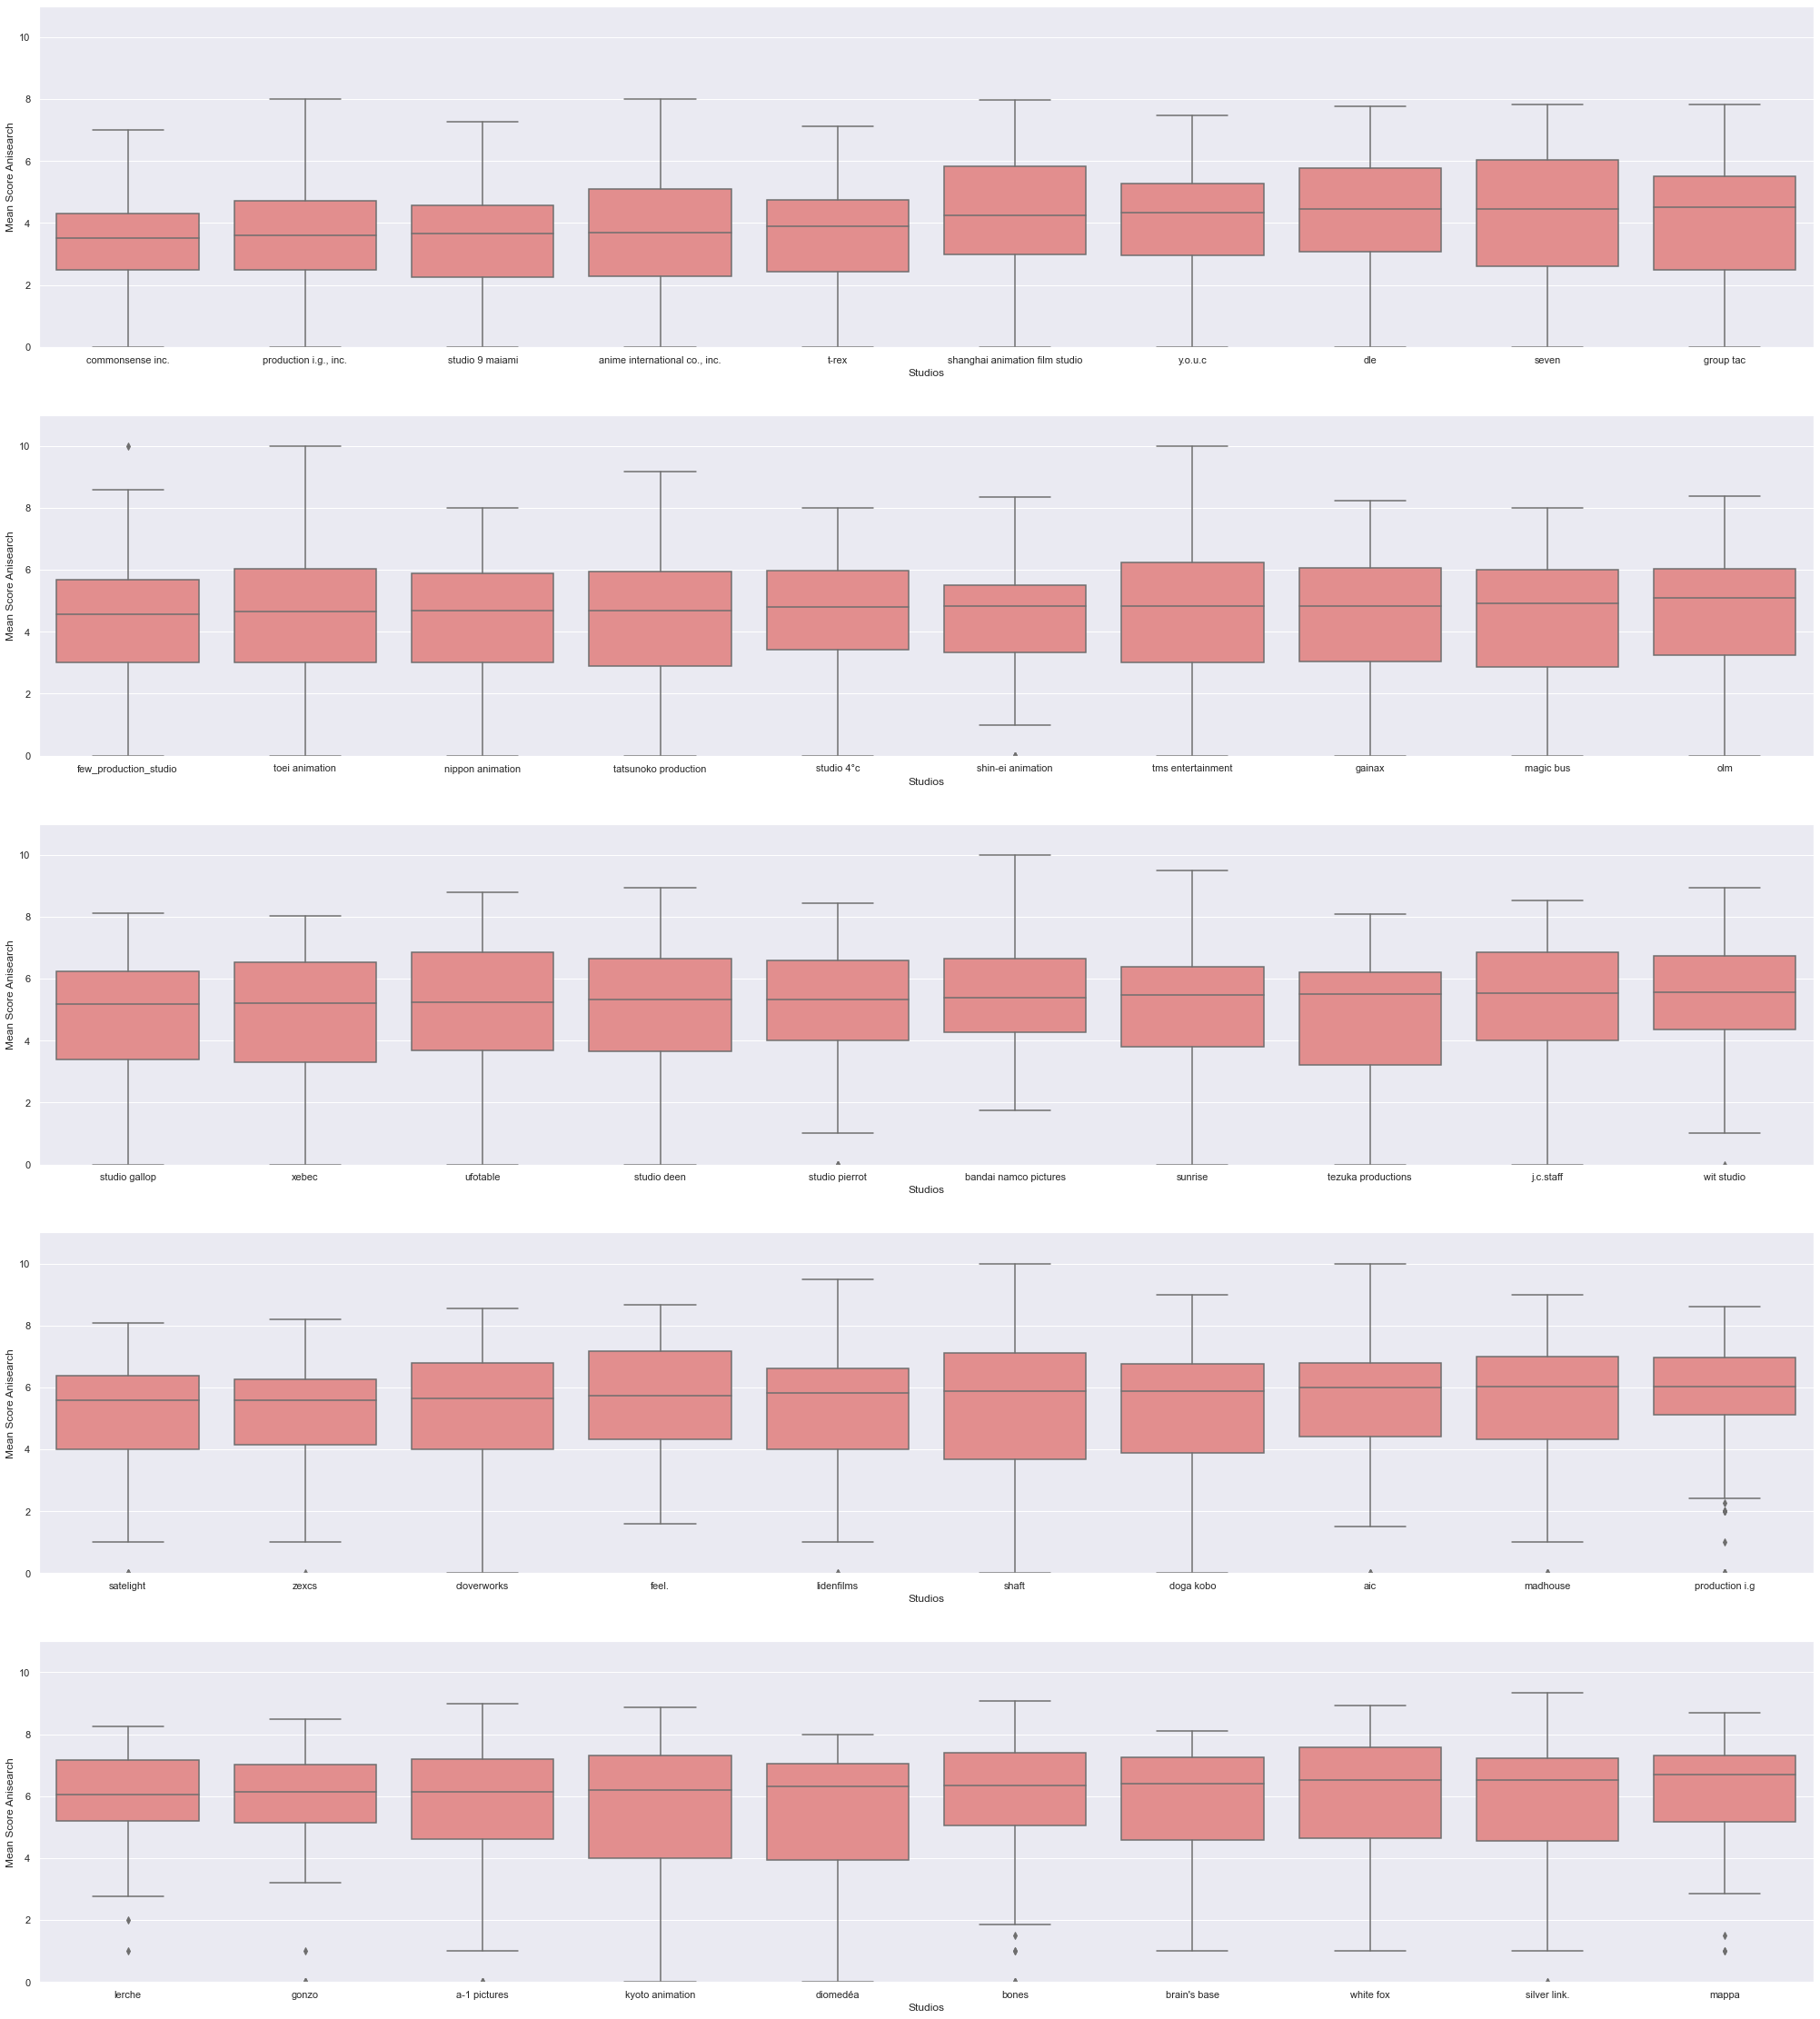

In [150]:
def median_score_anisearch_by_studio(studio):
    return anime_studios[anime_studios[studio] == 1]["mean_score_anisearch"].median()

studios.sort(key=median_score_anisearch_by_studio)
box_plot_studios_score("anisearch", studios, color="lightcoral")